In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.style.use('ggplot')

In [3]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Imacec.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imacec = imacec.round(1)
imacec.tail()

,imacec
Fecha,
2020-11-01,1.0
2020-12-01,-0.1
2021-01-01,-2.9
2021-02-01,-2.1
2021-03-01,5.8


In [4]:
exp_imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20EEE%20PIB%20e%20IMACEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
exp_imacec = exp_imacec[['IMACEC un mes atrás']]
exp_imacec.columns = ['exp_imacec']
exp_imacec = exp_imacec.shift(-1)
exp_imacec.tail()

,exp_imacec
Fecha,
2020-12-01,-1.0
2021-01-01,-1.0
2021-02-01,-1.5
2021-03-01,1.6
2021-04-01,NaN


In [5]:
inflacion  = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Inflacion%20mensual.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
inflacion.columns = ['inflacion']
inflacion.tail()

,inflacion
Fecha,
2020-12-01,0.3
2021-01-01,0.7
2021-02-01,0.2
2021-03-01,0.4
2021-04-01,0.4


In [6]:
exp_inflacion = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20EEE%20Inflacion.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
exp_inflacion = exp_inflacion[['En el mes']]
exp_inflacion.columns = ['exp_inflacion']
exp_inflacion.tail()

,exp_inflacion
Fecha,
2020-12-01,0.2
2021-01-01,0.3
2021-02-01,0.3
2021-03-01,0.4
2021-04-01,0.3


In [7]:
imacec = pd.concat([imacec, exp_imacec], axis=1)
imacec['exp_naive'] = imacec['imacec'].shift(1)
imacec = imacec.dropna()
print(imacec.index)
imacec.tail()


DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', name='Fecha', length=254, freq='MS')


,imacec,exp_imacec,exp_naive
Fecha,,,
2020-11-01,1.0,1.0,-0.9
2020-12-01,-0.1,-1.0,1.0
2021-01-01,-2.9,-1.0,-0.1
2021-02-01,-2.1,-1.5,-2.9
2021-03-01,5.8,1.6,-2.1


In [8]:
inflacion = pd.concat([inflacion, exp_inflacion], axis=1)
inflacion['exp_naive'] = inflacion['inflacion'].shift(1)
inflacion = inflacion.dropna()
print(inflacion.index)
inflacion.tail()

DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Fecha', length=255, freq='MS')


,inflacion,exp_inflacion,exp_naive
Fecha,,,
2020-12-01,0.3,0.2,-0.1
2021-01-01,0.7,0.3,0.3
2021-02-01,0.2,0.3,0.7
2021-03-01,0.4,0.4,0.2
2021-04-01,0.4,0.3,0.4


<AxesSubplot:>

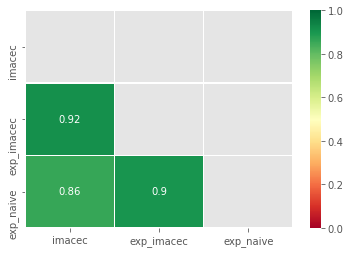

In [12]:
corr_mat = imacec.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

<AxesSubplot:>

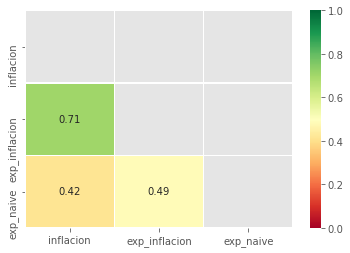

In [13]:
corr_mat = inflacion.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

<AxesSubplot:xlabel='Fecha'>

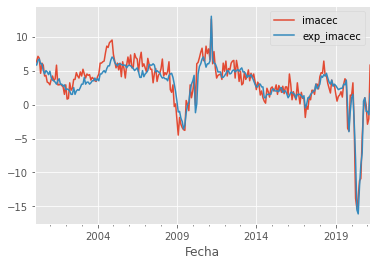

In [14]:
imacec[['imacec', 'exp_imacec']].plot()

<AxesSubplot:xlabel='Fecha'>

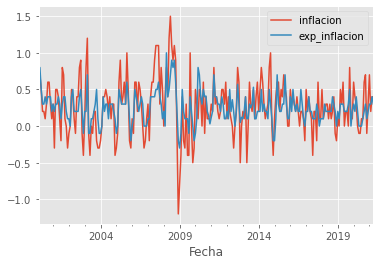

In [15]:
inflacion[['inflacion', 'exp_inflacion']].plot()

In [16]:
print(imacec.mean().round(2))
print(inflacion.mean().round(2))

imacec        3.25
exp_imacec    3.04
exp_naive     3.26
dtype: float64
inflacion        0.26
exp_inflacion    0.25
exp_naive        0.26
dtype: float64


In [17]:
def sesgo(y, y_pred):
    return np.mean(y_pred - y)

In [18]:
# Función para calcular las métricas de evaluación. 
def get_metrics(modelo, y, y_pred):
    return pd.DataFrame({
                'Sesgo': sesgo(y, y_pred),
                'MAE': mean_absolute_error(y, y_pred),
                'RMSE': mean_squared_error(y, y_pred),
                'R2': r2_score(y, y_pred)},
                index=[modelo])

In [30]:
metricas = pd.DataFrame()
metricas = metricas.append(get_metrics('Encuesta', imacec['imacec'], imacec['exp_imacec']))
metricas = metricas.append(get_metrics('Naive', imacec['imacec'], imacec['exp_naive']))
metricas.round(2)

,Sesgo,MAE,RMSE,R2
Encuesta,-0.21,1.08,2.09,0.84
Naive,0.00,1.29,3.57,0.72


In [31]:
metricas = pd.DataFrame()
metricas = metricas.append(get_metrics('Encuesta', inflacion['inflacion'], inflacion['exp_inflacion']))
metricas = metricas.append(get_metrics('Naive', inflacion['inflacion'], inflacion['exp_naive']))
metricas.round(2)

,Sesgo,MAE,RMSE,R2
Encuesta,-0.01,0.21,0.07,0.48
Naive,-0.00,0.32,0.17,-0.17


<AxesSubplot:xlabel='imacec', ylabel='exp_imacec'>

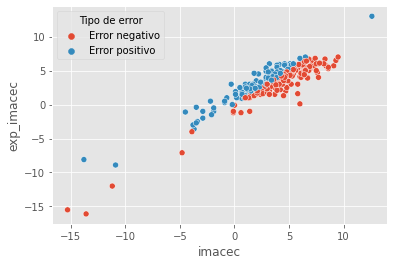

In [20]:
imacec['Tipo de error'] = np.where(imacec['exp_imacec'] > imacec['imacec'], 'Error positivo', 'Error negativo')
sns.scatterplot(data=imacec, x='imacec', y='exp_imacec', hue='Tipo de error')

In [21]:
imacec['Tipo de error'].value_counts(normalize=True)

Error negativo    0.586614
Error positivo    0.413386
Name: Tipo de error, dtype: float64

<AxesSubplot:xlabel='inflacion', ylabel='exp_inflacion'>

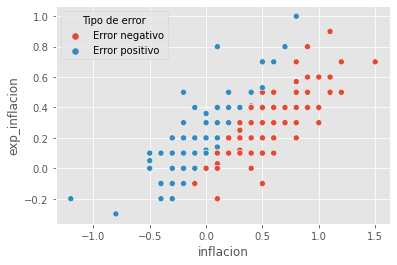

In [23]:
inflacion['Tipo de error'] = np.where(inflacion['exp_inflacion'] > inflacion['inflacion'], 'Error positivo', 'Error negativo')
sns.scatterplot(data=inflacion, x='inflacion', y='exp_inflacion', hue='Tipo de error')

In [24]:
inflacion['Tipo de error'].value_counts(normalize=True)

Error negativo    0.572549
Error positivo    0.427451
Name: Tipo de error, dtype: float64